In [28]:
import vonenet
import torchvision
import torch
import deeplake
import numpy as np
import matplotlib.pyplot as plt


Neuronal distributions gabor parameters
***check*****
[0 1]
***check*****
[0. 1.]
***check*****
[0. 1.]
***check*****
[0. 1.]
***check*****
[0. 1.]
Model:  VOneNet
VOneBlock(
  (simple_conv_q00): GFB()
  (simple_conv_q01): GFB()
  (simple_conv_q10): GFB()
  (simple_conv_q11): GFB()
  (simple_conv_q20): GFB()
  (simple_conv_q21): GFB()
  (simple_conv_q30): GFB()
  (simple_conv_q31): GFB()
  (simple): ReLU(inplace=True)
  (complex): Identity()
  (gabors): Identity()
  (noise): ReLU(inplace=True)
  (output): Identity()
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([16, 3, 64, 64])
*************************************************************
<built-in method type of Tensor object at 0x7f1b170e42c8>
torch.Size([16, 64, 16, 32])


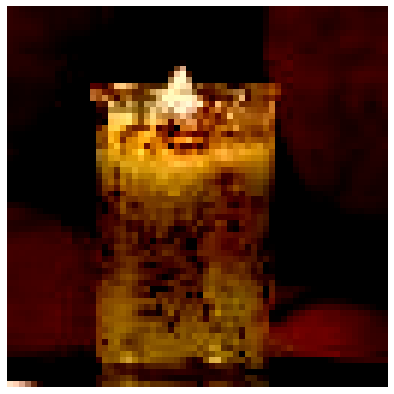

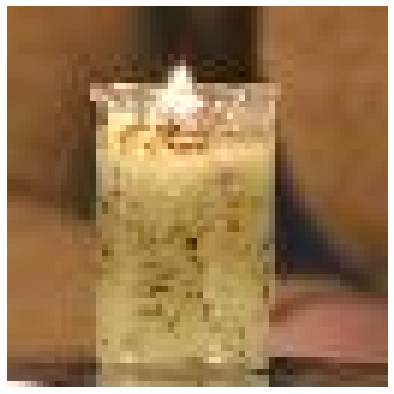

array([0])

In [29]:
v1_model = vonenet.get_model(model_arch=None, pretrained=False, noise_mode=None).module
# v1_model = vonenet.get_model(model_arch=None, pretrained=False, noise_mode=None, image_size=32, visual_degrees=3, sf_max=5, stride=1, ksize=15).module
#v1_model = vonenet.get_model (model_arch='resnet50', pretrained=False).module

print(v1_model)

data_path = '/u/jkaur/vonenet/tiny-2/val'

bsize = 16
crop = 256 # 48  256
px = 224 # 32  224

normalize = torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                             std=[0.5, 0.5, 0.5])
# dataset = torchvision.datasets.ImageFolder(data_path,
#     torchvision.transforms.Compose([
#         torchvision.transforms.Resize(crop),
#         torchvision.transforms.CenterCrop(px),
#         torchvision.transforms.ToTensor(),
#         normalize,
#     ]))

dataset = torchvision.datasets.ImageFolder(data_path,
    torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        normalize,
    ]))

data_loader = torch.utils.data.DataLoader(dataset, batch_size=bsize, shuffle=True, num_workers=6, pin_memory=True)

dataloader_iterator = iter(data_loader)
X, _ = next(dataloader_iterator)
print(X.shape)

activations = v1_model(X)
print(activations.shape)
im_ind = 15
input_im = np.moveaxis(X[im_ind].numpy(), 0, -1)
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(7, 7)
im_h = ax.imshow(input_im)
im_h.set_clim([0, 1])
ax.set_axis_off()
plt.show()

im_ind = 15
input_im = input_im / 2 + 0.5
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(7, 7)
im_h = ax.imshow(input_im)
im_h.set_clim([0, 1])
ax.set_axis_off()
plt.show()

np.argsort(np.std(activations[im_ind].detach().numpy()))



VOneBlock(
  (simple_conv_q00): GFB()
  (simple_conv_q01): GFB()
  (simple_conv_q10): GFB()
  (simple_conv_q11): GFB()
  (simple_conv_q20): GFB()
  (simple_conv_q21): GFB()
  (simple_conv_q30): GFB()
  (simple_conv_q31): GFB()
  (simple): ReLU(inplace=True)
  (complex): Identity()
  (gabors): Identity()
  (noise): ReLU(inplace=True)
  (output): Identity()
)
0 0
1 1
2 2
3 3


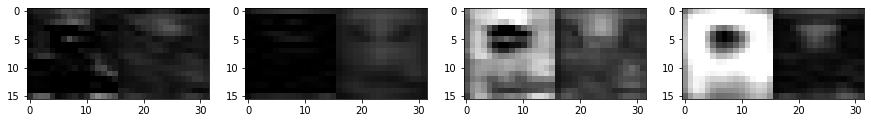

In [35]:

v1_ind= range(0,4)
print(v1_model)
fig, ax = plt.subplots(nrows=1, ncols=len(v1_ind))
fig.set_size_inches(15,5)
max_activations = np.amax(activations[im_ind].numpy())/np.sqrt(2)
for v1_i, v1_ind_ in enumerate(v1_ind):
    print(v1_i,v1_ind_)
    v1_im = activations[im_ind,v1_ind_].numpy()
    v1_im = v1_im / max_activations
    im_h=ax[v1_i].imshow(v1_im, cmap='gray')
    im_h.set_clim([0, 1])
    #ax[v1_i].set_axis_off()
#plt.show()


# num_channels=64
# max_columns = 16

# fig, ax = plt.subplots(nrows=num_channels//max_columns, ncols=max_columns)

# fig.set_size_inches(15,15)
# for i in range(num_channels):
#     v1_k = v1_model.simple_conv_q11.weight[i,:,:,:].numpy().mean(axis=0)
#     v1_k = v1_k / np.amax(np.abs(v1_k))/2+0.5
#     im_h=ax[i//max_columns, np.mod(i,max_columns)].imshow(v1_k, cmap='gray')
# #     ax[i//num_channels, np.mod(i,num_channels)].set_xlim([0, 223])
#     im_h.set_clim([0, 1])
#     ax[i//max_columns, np.mod(i,max_columns)].set_axis_off()
# plt.show()

# for i in range(num_channels):
#     v1_k = v1_model.simple_conv_q11.weight[i,:,:,:].numpy().mean(axis=0)
#     v1_k = v1_k / np.amax(np.abs(v1_k))/2+0.5
#     im_h=ax[i//max_columns, np.mod(i,max_columns)].imshow(v1_k, cmap='gray')
# #     ax[i//num_channels, np.mod(i,num_channels)].set_xlim([0, 223])
#     im_h.set_clim([0, 1])
#     ax[i//max_columns, np.mod(i,max_columns)].set_axis_off()
# plt.show()

# for i in range(num_channels):
#     v1_k = v1_model.simple_conv_q21.weight[i,:,:,:].numpy().mean(axis=0)
#     v1_k = v1_k / np.amax(np.abs(v1_k))/2+0.5
#     im_h=ax[i//max_columns, np.mod(i,max_columns)].imshow(v1_k, cmap='gray')
# #     ax[i//num_channels, np.mod(i,num_channels)].set_xlim([0, 223])
#     im_h.set_clim([0, 1])
#     ax[i//max_columns, np.mod(i,max_columns)].set_axis_off()
# plt.show()


# visual_degrees = 8
# image_size = 224

# nyquist_f = 1/(visual_degrees/image_size)/2 / np.sqrt(2)

# print(nyquist_f)